In [10]:
import sys
!{sys.executable} -m pip install numpy scipy matplotlib

In [1]:
import os
import configparser
import random

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat, savemat
from scipy.signal import decimate, resample

In [2]:
config = configparser.ConfigParser()
config.read('../../config.ini')

['../../config.ini']

In [3]:
PROJECT_DIR = config.get('PATHS', 'PROJECT_PATH')
PAIRED_DATA_DIR = os.path.join(PROJECT_DIR, 'data/paired')
PAIRED_TRAIN_DIR = os.path.join(PROJECT_DIR, 'data/paired/train')
PAIRED_VALID_DIR = os.path.join(PROJECT_DIR, 'data/paired/validation')
PAIRED_DATA_DIR2 = os.path.join(PROJECT_DIR, 'data/paired2')
PAIRED_TRAIN_DIR2 = os.path.join(PROJECT_DIR, 'data/paired2/train')
PAIRED_VALID_DIR2 = os.path.join(PROJECT_DIR, 'data/paired2/validation')
INTERIM_MECG_DATA_DIR = os.path.join(PROJECT_DIR, 'data/interim/mecg')
INTERIM_FECG_DATA_DIR = os.path.join(PROJECT_DIR, 'data/interim/fecg')

SYNDB_FECG_DIR = os.path.join(INTERIM_FECG_DATA_DIR, 'fecgsyndb-1.0.0')
SYNDB_MECG_DIR = os.path.join(INTERIM_MECG_DATA_DIR, 'fecgsyndb-1.0.0')
BIDMC_MECG_DIR = os.path.join(INTERIM_MECG_DATA_DIR, 'bidmc-1.0.0')
FANTASIA_MECG_DIR = os.path.join(INTERIM_MECG_DATA_DIR, 'fantasia-1.0.0')
NSRDB_MECG_DIR = os.path.join(INTERIM_MECG_DATA_DIR, 'nsrdb-1.0.0')
STDB_MECG_DIR = os.path.join(INTERIM_MECG_DATA_DIR, 'stdb-1.0.0')

os.makedirs(PAIRED_DATA_DIR, exist_ok=True)
os.makedirs(PAIRED_TRAIN_DIR, exist_ok=True)
os.makedirs(PAIRED_VALID_DIR, exist_ok=True)

TOTAL_FILES = 40000
TARGET_FS = 125

In [4]:
SIGNAL_KEYS = ('filtered', 'light', 'raw')

def downsample(curr_freq : int, signal : np.ndarray, target_freq = 125, axis : int = 0) -> np.ndarray: 
    '''Downsamples signal at curr_freq to target_freq '''
    if curr_freq % target_freq: # if need .resample 
        target_samples = int(signal.shape[axis] / curr_freq * target_freq)
        return resample(signal, target_samples, axis=axis)
        
    return decimate(signal, int(curr_freq / target_freq), axis=axis)

def load_file(filename):
    d = loadmat(filename)
    fs = d['fs'][0][0]
    
    # for k in SIGNAL_KEYS:
    #     if k in d:
    #         shape = d[k].shape
    #         d[k] = downsample(fs, d[k], target_freq=125, axis=0 if shape[0] > shape[1] else 1)
    if 'peaks' in d:
        d['peaks'] = np.rint(d['peaks'][0] * TARGET_FS / fs).astype('int64')
    
    return d

In [6]:
sample_fecg = load_file(os.path.join(SYNDB_FECG_DIR, 'sub01_snr03dB_l1_c4_fecg1'))
sample_mecg = load_file(os.path.join(SYNDB_MECG_DIR, 'sub01_snr03dB_l1_c4_mecg'))
indices = sample_fecg['peaks']

In [7]:
sample_fecg['comments']

array(['n:300000                    ', 'fhr:143.0077                ',
       'mhr:107.7705                ', 'mtypeacc:nsr                ',
       'ftypeacc:nsr                ', 'SNRfm:-9.4120               ',
       'mheart:2.0944 0.2000 0.4000 ', 'fheart:0.1598 0.2614 -0.3921',
       'refpos:3.1416 0.5000 -0.3000', 'SNRmn:3                     ',
       'macc:0                      ', 'facc:0                      ',
       'maccmean:0                  ', 'maccstd:1                   ',
       'faccmean:0.0000             ', 'faccstd:1.0000              ',
       'ftraj:none                  ', 'fname:aecg                  ',
       'mres:0.2394                 ', 'fres:0.8531                 ',
       'mvcg:6                      ', 'fvcg:2                      ',
       'evcg:3                      ', 'posdev:0                    ',
       'mectb:1                     ', 'fectb:1                     ',
       'ntype:                      ', 'nfetus:1                    ',
      

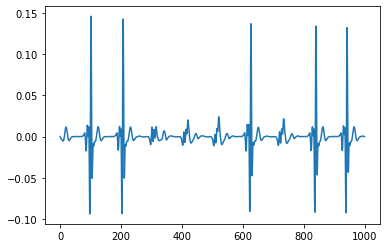

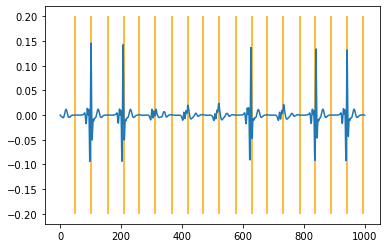

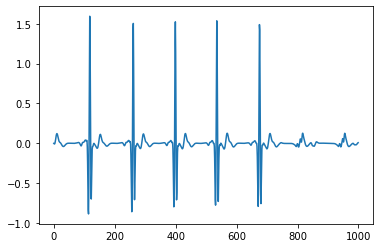

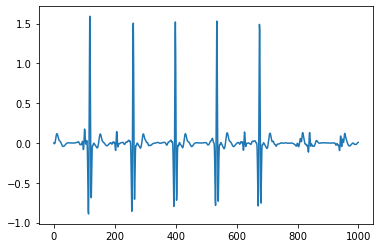

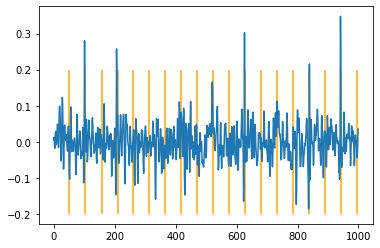

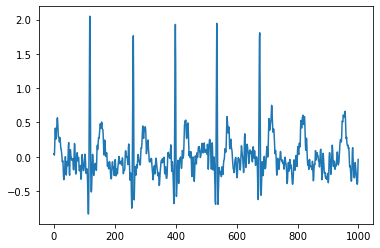

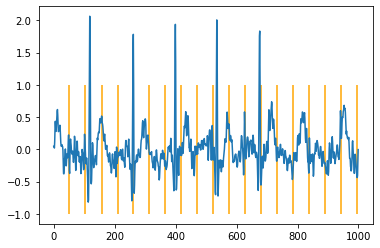

In [10]:
plt.plot(loadmat(os.path.join(SYNDB_FECG_DIR, 'sub01_snr03dB_l1_c4_fecg1'))['filtered'][0,:1000])
plt.show()
plt.vlines([ind for ind in indices if ind < 1000], -.2, .2, color='orange')
plt.plot(sample_fecg['filtered'][0,:1000])
plt.show()
plt.plot(sample_mecg['filtered'][0,:1000])
plt.show()
plt.plot(sample_fecg['filtered'][0,:1000]+sample_mecg['filtered'][0,:1000])
plt.show()
plt.vlines([ind for ind in indices if ind < 1000], -.2, .2, color='orange')
plt.plot(sample_fecg['raw'][0,:1000])
plt.show()
plt.plot(sample_mecg['raw'][0,:1000])
plt.show()
plt.vlines([ind for ind in indices if ind < 1000], -1, 1, color='orange')
plt.plot(sample_fecg['raw'][0,:1000]+sample_mecg['raw'][0,:1000])
plt.show()

In [8]:
sample_fecg = load_file(os.path.join(SYNDB_FECG_DIR, 'sub01_snr12dB_l1_c4_fecg1'))
sample_mecg = load_file(os.path.join(SYNDB_MECG_DIR, 'sub01_snr12dB_l1_c4_mecg'))
indices = sample_fecg['peaks']

In [ ]:
plt.vlines([ind for ind in indices if ind < 1000], -.2, .2, color='orange')
plt.plot(sample_fecg['filtered'][0,:1000])
plt.show()
plt.plot(sample_mecg['filtered'][0,:1000])
plt.show()
plt.plot(sample_fecg['filtered'][0,:1000]+sample_mecg['filtered'][0,:1000])
plt.show()
plt.vlines([ind for ind in indices if ind < 1000], -.2, .2, color='orange')
plt.plot(sample_fecg['raw'][0,:1000])
plt.show()
plt.plot(sample_mecg['raw'][0,:1000])
plt.show()
plt.vlines([ind for ind in indices if ind < 1000], -1, 1, color='orange')
plt.plot(sample_fecg['raw'][0,:1000]+sample_mecg['raw'][0,:1000])
plt.show()

syndb


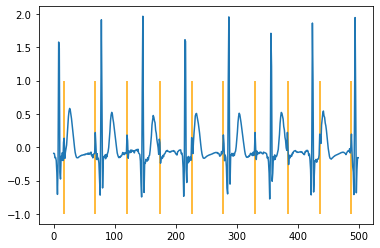

syndb


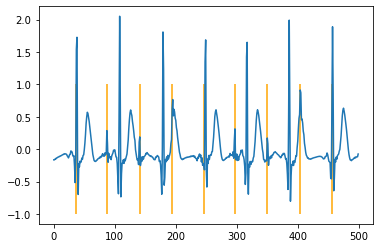

bidmc


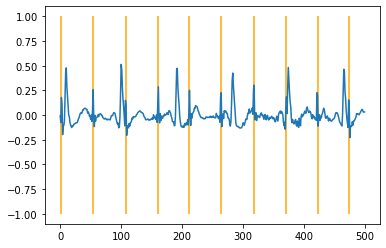

bidmc


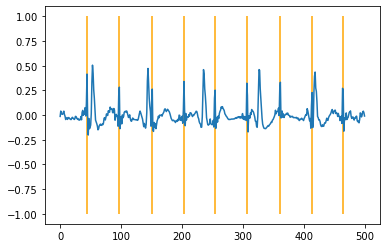

fantasia


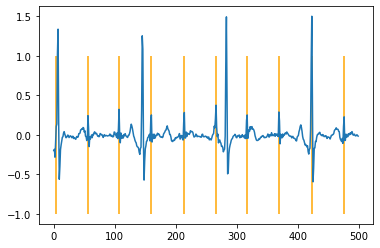

fantasia


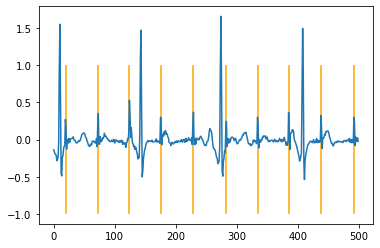

nsrdb


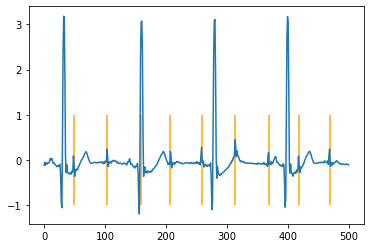

nsrdb


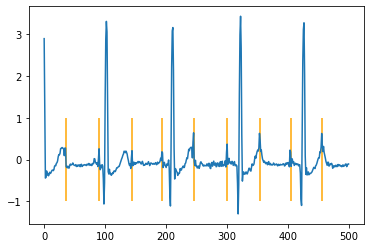

stdb


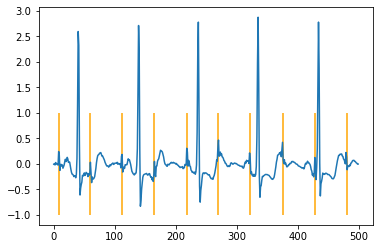

stdb


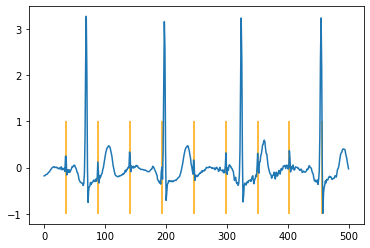

In [10]:
seen = {}
for f in os.listdir(PAIRED_VALID_DIR):
    prefix = f.partition('_')[0]
    if prefix not in seen:
        seen[prefix] = 0
    elif seen[prefix] > 1:
        continue
    seen[prefix] += 1
    print(prefix)
    d = loadmat(os.path.join(PAIRED_VALID_DIR, f))
    indices = d['fecg_peaks'].flatten()
    plt.vlines(indices, -1, 1, color='orange')
    plt.plot(d['fecg_signal'].flatten()+d['mecg_signal'].flatten())
    plt.show()
    # print(d)

In [11]:
sample = loadmat(os.path.join(PAIRED_VALID_DIR, 'bidmc_1_2_0_4_2'))

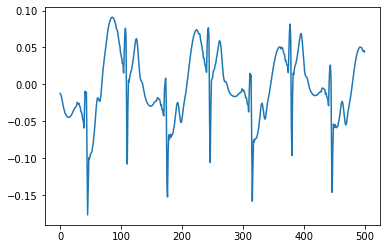

In [12]:
plt.plot(sample['fecg_clean'][0])
plt.show()

In [13]:
from denoising import preprocess

In [14]:
preprocess_params = {}
preprocess_params['numtaps'] = 21

In [15]:
pd, _ = preprocess(sample['fecg_clean'][0], 125, **preprocess_params)

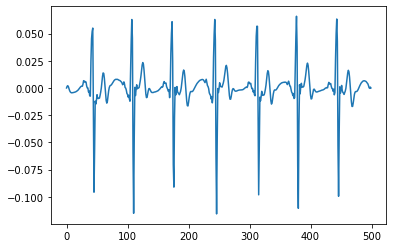

In [16]:
plt.plot(pd)
plt.show()

In [ ]:
count = 0
for root, dirs, files in os.walk(PAIRED_VALID_DIR2):
    for name in files:
        if 'fantasia' in name:
            if count % 500 == 0:
                print(name)
                f = os.path.join(root, name)
                d = loadmat(f)
                aecg = d['fecg_signal'].flatten()+d['mecg_signal'].flatten()
                plt.plot(aecg)
                plt.vlines(d['fecg_peaks'].flatten(), aecg.min(), aecg.max(), color='purple')
                plt.show()
                plt.plot(d['fecg_clean'].flatten())
                plt.show()
                plt.plot(d['mecg_signal'].flatten())
                plt.show()
            count += 1

In [30]:
for i, (a, b, c) in enumerate([[1,2,3],[6,7,8]]):
    print(i, a, b, c)

0 1 2 3
1 6 7 8
